In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
data = pd.read_csv('tcs.csv')
print(data.head())
print ('\n Data Types:')
print (data.dtypes)

  Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0    TCS     EQ  09-May-2018     3441.20     3440.20     3494.75     3440.2   
1    TCS     EQ  10-May-2018     3489.30     3502.95     3511.15     3440.2   
2    TCS     EQ  11-May-2018     3451.25     3454.20     3485.00     3442.5   
3    TCS     EQ  14-May-2018     3456.95     3457.00     3471.00     3410.8   
4    TCS     EQ  15-May-2018     3433.55     3450.00     3495.80     3433.7   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      3488.5      3489.30        3480.95                1307525   
1      3446.3      3451.25        3478.59                1929339   
2      3461.0      3456.95        3461.07                1313938   
3      3440.0      3433.55        3427.81                1216947   
4      3487.0      3482.40        3477.97                 976445   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  4.551423e+09          74986           7

In [5]:
dateparse = lambda dates: pd.datetime.strptime('%D-%M-%Y',dates)
data = pd.read_csv('tcs.csv', parse_dates=['Date'], index_col='Date')
print (data.head())

           Symbol Series  Prev Close  Open Price  High Price  Low Price  \
Date                                                                      
2018-05-09    TCS     EQ     3441.20     3440.20     3494.75     3440.2   
2018-05-10    TCS     EQ     3489.30     3502.95     3511.15     3440.2   
2018-05-11    TCS     EQ     3451.25     3454.20     3485.00     3442.5   
2018-05-14    TCS     EQ     3456.95     3457.00     3471.00     3410.8   
2018-05-15    TCS     EQ     3433.55     3450.00     3495.80     3433.7   

            Last Price  Close Price  Average Price  Total Traded Quantity  \
Date                                                                        
2018-05-09      3488.5      3489.30        3480.95                1307525   
2018-05-10      3446.3      3451.25        3478.59                1929339   
2018-05-11      3461.0      3456.95        3461.07                1313938   
2018-05-14      3440.0      3433.55        3427.81                1216947   
2018-05-15  

In [6]:
data.index

DatetimeIndex(['2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-28', '2018-05-29', '2018-05-30',
               '2018-05-31', '2018-06-01', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15',
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29', '2018-07-02', '2018-07-03',
               '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-09',
               '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13',
               '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19',
               '2018-07-20', '2018-07-23', '2018-07-24', '2018-07-25',
      

In [7]:
ts = data['Open Price'] 
ts.head(10)

Date
2018-05-09    3440.20
2018-05-10    3502.95
2018-05-11    3454.20
2018-05-14    3457.00
2018-05-15    3450.00
2018-05-16    3479.95
2018-05-17    3512.95
2018-05-18    3480.80
2018-05-21    3528.70
2018-05-22    3558.00
Name: Open Price, dtype: float64

In [10]:
ts['2018-05-09']
from datetime import datetime
#ts[datetime(2018,5,9)]
#ts['2018-10-01':'2018-07-02']
#ts[:'2018-05-28']
#ts['2018']

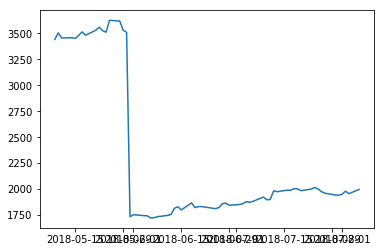

In [11]:
plt.plot(ts)

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean=timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd=timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

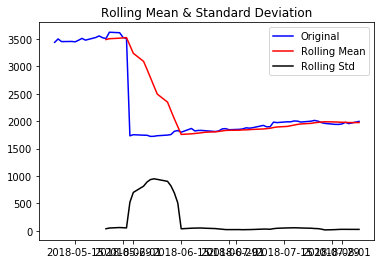

Results of Dickey-Fuller Test:
Test Statistic                 -1.755200
p-value                         0.402920
#Lags Used                      0.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [13]:
test_stationarity(ts)

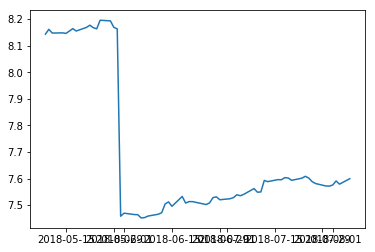

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)

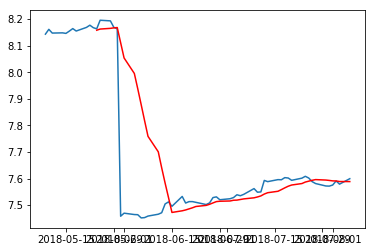

In [15]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [16]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2018-05-09         NaN
2018-05-10         NaN
2018-05-11         NaN
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
2018-05-21         NaN
2018-05-22         NaN
2018-05-23         NaN
2018-05-24    0.005294
Name: Open Price, dtype: float64

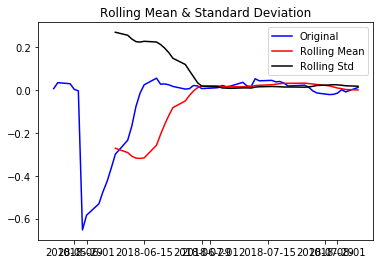

Results of Dickey-Fuller Test:
Test Statistic                 -3.720350
p-value                         0.003836
#Lags Used                      8.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [17]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

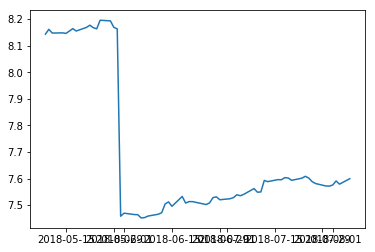

In [18]:
#expwighted_avg =pd.ewma(ts_log, halflife=12)
#expwighted_avg =  pd.ewma(ts_log,span=12,freq="D")
plt.plot(ts_log)
#plt.plot(expwighted_avg, color='red')

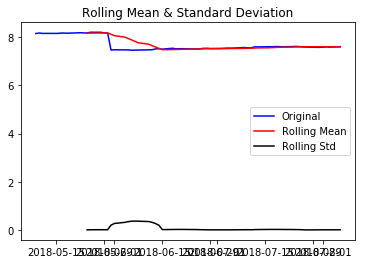

Results of Dickey-Fuller Test:
Test Statistic                 -1.800564
p-value                         0.380182
#Lags Used                      0.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [19]:
test_stationarity(ts_log)

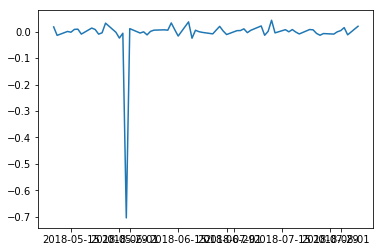

In [20]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

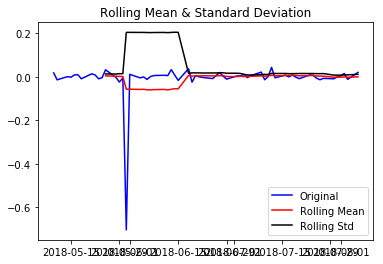

Results of Dickey-Fuller Test:
Test Statistic                -7.919068e+00
p-value                        3.766813e-12
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64


In [21]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

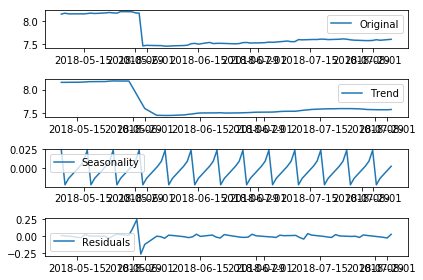

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

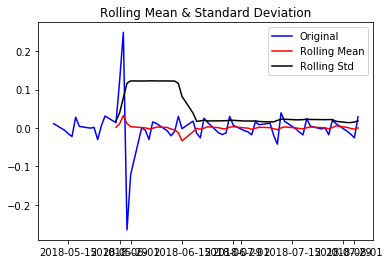

Results of Dickey-Fuller Test:
Test Statistic                -7.605640e+00
p-value                        2.326294e-11
#Lags Used                     1.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

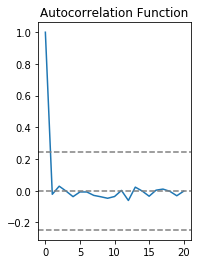

In [27]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

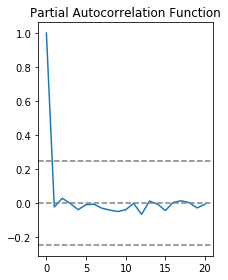

In [28]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
from statsmodels.tsa.arima_model import ARIMA

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.5031')

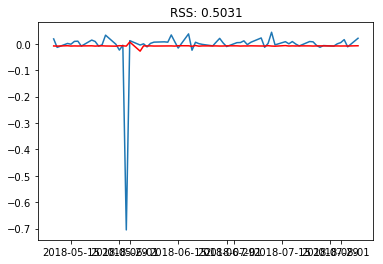

In [30]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.5031')

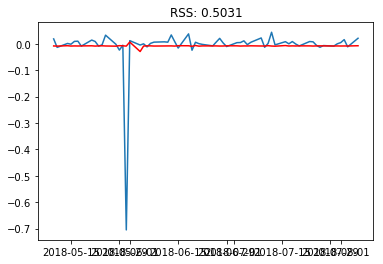

In [31]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.5036')

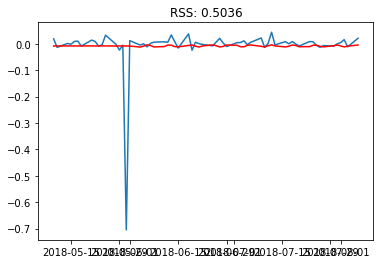

In [32]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2018-05-10   -0.008622
2018-05-11   -0.008621
2018-05-14   -0.008463
2018-05-15   -0.008619
2018-05-16   -0.008722
dtype: float64


In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-05-10   -0.008622
2018-05-11   -0.017243
2018-05-14   -0.025706
2018-05-15   -0.034325
2018-05-16   -0.043047
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
#print(ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-05-09    8.143285
2018-05-10    8.134663
2018-05-11    8.126042
2018-05-14    8.117578
2018-05-15    8.108960
dtype: float64

Text(0.5, 1.0, 'RMSE: 624.6604')

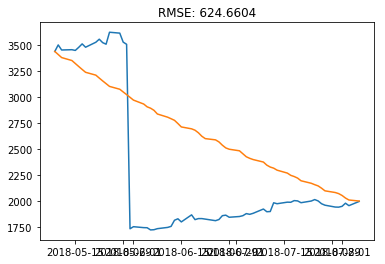

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

          Date      Symbol  Series  Open Price   High Price   Low Price  \
0  01-Oct-2018   ICICIBANK      EQ      306.30       315.05      300.55   
1  28-Sep-2018   ICICIBANK      EQ      309.10       311.60      301.80   
2  27-Sep-2018   ICICIBANK      EQ      315.65       316.00      305.30   
3  26-Sep-2018   ICICIBANK      EQ      315.00       315.30      305.10   
4  25-Sep-2018   ICICIBANK      EQ      307.00       313.50      300.05   

    Last Traded Price    Close Price   Total Traded Quantity  \
0               314.20        314.00                21104376   
1               306.00        305.55                26289107   
2               308.30        306.65                24888615   
3               312.90        313.10                23224979   
4               310.95        311.10                30472132   

    Turnover (in Lakhs)  
0              65070.69  
1              80430.36  
2              76647.32  
3              72183.70  
4              93241.88  

 Data T

'"predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ft.index)\npredictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)\npredictions_ARIMA_log.head()\nplt.plot(predictions_ARIMA)'

                Symbol  Series  Open Price   High Price   Low Price  \
Date                                                                  
2018-10-01   ICICIBANK      EQ      306.30       315.05      300.55   
2018-09-28   ICICIBANK      EQ      309.10       311.60      301.80   
2018-09-27   ICICIBANK      EQ      315.65       316.00      305.30   
2018-09-26   ICICIBANK      EQ      315.00       315.30      305.10   
2018-09-25   ICICIBANK      EQ      307.00       313.50      300.05   

             Last Traded Price    Close Price   Total Traded Quantity  \
Date                                                                    
2018-10-01               314.20        314.00                21104376   
2018-09-28               306.00        305.55                26289107   
2018-09-27               308.30        306.65                24888615   
2018-09-26               312.90        313.10                23224979   
2018-09-25               310.95        311.10                304

DatetimeIndex(['2018-10-01', '2018-09-28', '2018-09-27', '2018-09-26',
               '2018-09-25', '2018-09-24', '2018-09-21', '2018-09-19',
               '2018-09-18', '2018-09-17', '2018-09-14', '2018-09-12',
               '2018-09-11', '2018-09-10', '2018-09-07', '2018-09-06',
               '2018-09-05', '2018-09-04', '2018-09-03', '2018-08-31',
               '2018-08-30', '2018-08-29', '2018-08-28', '2018-08-27',
               '2018-08-24', '2018-08-23', '2018-08-21', '2018-08-20',
               '2018-08-17', '2018-08-16', '2018-08-14', '2018-08-13',
               '2018-08-10', '2018-08-09', '2018-08-08', '2018-08-07',
               '2018-08-06', '2018-08-03', '2018-08-02', '2018-08-01',
               '2018-07-31', '2018-07-30', '2018-07-27', '2018-07-26',
               '2018-07-25', '2018-07-24', '2018-07-23', '2018-07-20',
               '2018-07-19', '2018-07-18', '2018-07-17', '2018-07-16',
               '2018-07-13', '2018-07-12', '2018-07-11', '2018-07-10',
      

In [37]:
import plotly.plotly as py 
import plotly.graph_objs as go
#import plotly.figure_factory as FF
from plotly.offline import  init_notebook_mode,plot
df = pd.read_csv('tcs.csv')

df1 = pd.read_csv('tcs2.csv')




In [39]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-05-09    8.143285
2018-05-10    8.134663
2018-05-11    8.126042
2018-05-14    8.117578
2018-05-15    8.108960
dtype: float64

In [41]:
df1.Open[0]=predictions_ARIMA[0]
df1.Open[1]=predictions_ARIMA[1]
df1.Open[2]=predictions_ARIMA[2]
df1.Open[3]=predictions_ARIMA[3]
df1.Open[4]=predictions_ARIMA[4]
df1.Open[5]=predictions_ARIMA[5]
df1.Open[6]=predictions_ARIMA[6]
df1.Open[7]=predictions_ARIMA[7]
df1.Open[8]=predictions_ARIMA[8]
df1.Open[9]=predictions_ARIMA[9]
df1.Open[10]=predictions_ARIMA[10]

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\pm bhatiya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\pm bhatiya\appdata\local\programs\pyt

In [43]:
trace = go.Scatter(
                  x = df['Date'], y = df['Open Price'],
                  name='Share Prices (in Rupees)'
)
trace2 = go.Scatter(
                  x = df1['Date'], y = df1['Open'],
                  name='Forcasting Share Prices (in Rupees)'
)
layout = go.Layout(
                  title='TCS  Share Prices over time (2018)',
                  plot_bgcolor='rgb(230, 230,230)', 
                  showlegend=True
                  )
fig = go.Figure(data=[trace,trace2], layout=layout)

plot(fig, filename='TCSforcasting.html')

'file://C:\\Users\\PM BHATIYA\\Pattern project\\TCSforcasting.html'